# Jumia Phone Price Prediction

## Business Understanding
 Retailers on Jumia's e-commerce platform face challenges in determining optimal pricing due to the competitive nature of the marketplace with over 100,000 of them and the time-consuming process of evaluating other competitor prices. Jumia has tasked us to analyze the phone catalog data and develop a predictive model that provides data-driven insights, enabling sellers to set competitive prices and maximize profitability effectively ahead of the November black Friday Big Sale.This model is expected to reduce the stress that retailers/sellers have to go through to determins the optimal average price of the product they intend to list on the platform.
 
 The objective of our project is as outlined below:
* Identify factors contributing to higher product visibility and marketability on Jumia’s first top pages.
* Explore the relationship between phone features and customer reviews.
* Develop a predictive model to recommend competitive, optimal pricing that promotes first-page placement.
* Assess the potential relationship between buyer ratings and product pricing.



## Data Understanding
The data we used was scrapped on 31st October 2024 from the Jumia Kenya e-commerce platform specifically under the smartphones category and sorted by popularity from the 1at to the last page. This gave us 12,000 listed devices. The python code used to scrape the data has been stored on a separate file **scrapped_data.ipynb** The packages used included the Beautiful Soup and Pandas. We saved the data in the csv format on our local machine as jumia_phones.csv that contains the below features respectively outlines:

**Name** This describes the brand and the feature of the phone.

**Price** This describes the current price the phone retails at.

**Old Price** This describes the previous price of the phone.

**Discount** The % discount calculated

**Rating** The buyers explicit rating of the product and service.

**Number of Reviews** The number of reviews from possible buyers.

**Search Ranking** The page and position of the product in terms of listing and popularity.

 The Name column contains unstructured text, combining brand names and product specifications (e.g., “Samsung Galaxy A12, 5000mAh, 128GB ROM, 6GB RAM”). To transform these into separate, structured attributes, we shall use Regex as it allows for consistent pattern matching, enabling the extraction of information such as battery capacity (e.g., numbers followed by "mAh") and storage (e.g., "GB" or "MB"), making data more structured and accessible for analysis.

Data Limitation:

* Dynamic Pricing: Prices on e-commerce platforms fluctuate frequently. Therefore, the scraped prices reflect only the prices at the time of scraping and may not represent current or future values.

* Incomplete or Inconsistent Data: Due to the variety of phone models and brands, some listings may lack uniform information (e.g., missing battery details or memory specifications), which could lead to variability in the parsed features.

* Unverified Ratings and Reviews: Ratings and reviews might be biased or manipulated, affecting any insights or model predictions derived from them.

* Potential Duplicate Listings: Duplicate or near-duplicate entries may exist if the same model is listed by multiple sellers, which could influence popularity and ranking statistics.




### Import Relevant Libraries

In [402]:
# Import libraries for inspecting, loading, cleaning and visualizing data
import pandas as pd
import numpy as np
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#regular expression
import re

## Data Preparation


### 1. Loading and Inspecting Data
Here we shall load the data using the pandas library imported.

Thereafter we shall inspect our files using the pandas attributes and methods.

In [403]:
# load the two datasets
phone_df = pd.read_csv('jumia_phones.csv')
#View the first 5 rows of the phone_pricing df
phone_df.head()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,"XIAOMI Redmi A3, 6.71"", 3GB RAM + 64GB (Dual S...","KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,"Tecno Spark 20, Android 13, 6.6"", 128GB + 4GB ...","KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,"Samsung Galaxy A05, 6.7'' 4GB RAM + 128GB ROM ...","KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,"Itel S23 6.6"", 128GB + 4GB RAM, 50MP Camera, (...","KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


In [404]:
#To see the column names
phone_df.columns

Index(['Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews',
       'Search Ranking'],
      dtype='object')

In [405]:
#To inspect the size of the df
phone_df.shape

(12000, 7)

In [406]:
#To inspect the detailed information of the dataset 
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               12000 non-null  object
 1   Price              12000 non-null  object
 2   Old Price          8101 non-null   object
 3   Discount           8101 non-null   object
 4   Rating             11700 non-null  object
 5   Number of Reviews  11700 non-null  object
 6   Search Ranking     12000 non-null  object
dtypes: object(7)
memory usage: 656.4+ KB


In [407]:
phone_df.describe()

,Name,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
count,12000,12000,8101,8101,11700,11700,12000
unique,40,34,19,22,12,38,12000
top,"Itel A18 5.0"", 32GB + 1GB RAM, 2400mAh - Lime ...","KSh 10,000","KSh 29,999",45%,4.3 out of 5,4.6 out of 5(9),"Page 166, Rank 4"
freq,300,1500,1200,900,1800,600,1


Summary Findings From Data Loading and Inspection:

* We have 7 columns in our DataFrame tagged 'Name', 'Price', 'Old Price', 'Discount', 'Rating', 'Number of Reviews' and 'Search Ranking'

* Our Dataset has 120,000 rows indicating 120,000 phones listed.

* All the columns are in the datatype object.

* We have 40 unique products signifying that one phone brand has multiple listing, 34 unique prices indicate price variations, likely due to discounts or seller pricing strategies, 19 unique old prices suggest that some products have similar prices,  22 unique discount percentages point to varying discount rates across products, 12 unique ratings indicate that products have received different levels of customer feedback, 38 unique values in the number of reviews column suggest variability in how many reviews each product has received and 12,000 unique values imply that each product has a unique search ranking based on its page position.

* The most frequently listed product is the "Samsung GALAXY A15," which indicates its popularity among sellers or consumers, KSh 10,000 is the most common price, suggesting that many products are priced around this figure. The most common old price is KSh 29,999, indicating that many products have been discounted from this price.
The most common discount of 45% suggests aggressive pricing strategies to attract buyers, The most common rating is 4.3 out of 5, indicating a generally positive perception of the products, 4.6 out of 5 from 9 reviews is the top rating, showing strong customer satisfaction for that specific product.
The top search ranking is "Page 21, Rank 35," suggesting the ranking method is working as intended, with many products on the site.


### 2. Feature Splitting
Here we intend to split the name column into several features containing

In [408]:
#Have the Name column in the variable name product_column
product_column = 'Name'  

# Define regex pattern to extract brand
pattern_brand = r"(?P<brand>[\w\s]+)(?=\+|,\s|\s|$)"

# Function to extract brand
def extract_brand(name):
    match = re.search(pattern_brand, name)
    return match.group('brand').strip() if match else None

# Extract brand
brand_df = phone_df[product_column].apply(extract_brand).rename('Brand')
# Convert to lowercase and then title case for uniformity
brand_df = brand_df.str.lower().str.title()

# Define regex pattern to extract screen size
screen_size_pattern = r"(?P<screen_size>\d+(\.\d+)?)(?=['\"]{1,2})"
# Function to extract screen size
def extract_screen_size(name):
    match = re.search(screen_size_pattern, name)
    return match.group('screen_size').strip() if match else None

# Extract screen size
size_df = phone_df[product_column].apply(extract_screen_size).rename('Screen Size')

# Define regex pattern to extract RAM
ram_pattern = r"\b(?P<RAM>\d\s?GB)\b"

# Function to extract RAM
def extract_ram(name):
    match = re.search(ram_pattern, name)
    return match.group('RAM').strip() if match else None

# Extract RAM
ram_df = phone_df[product_column].apply(extract_ram).rename('RAM')

# Define regex pattern to extract ROM
rom_pattern = r"\b(?P<ROM>\d{2,}\s?GB)\b"

# Function to extract ROM
def extract_rom(name):
    match = re.search(rom_pattern, name)
    return match.group('ROM').strip() if match else None

# Extract ROM
rom_df = phone_df[product_column].apply(extract_rom).rename('ROM')

# Define regex pattern to extract Color
color_pattern = r"[,-]\s*(?P<Color>([A-Z][a-z]+(?:\s[A-Z][a-z]+)*))\s*(?:\+.*)?(?=\s*\(|$)"

# Function to extract Color
def extract_color(name):
    match = re.search(color_pattern, name)
    return match.group('Color').strip() if match else None

# Extract Color
color_df = phone_df[product_column].apply(extract_color).rename('Color')

# Define regex pattern for extracting Warranty
warranty_pattern = r"(\d+)\s*(?:YR|WRTY)"

# Function to extract Warranty
def extract_warranty(name):
    warranty_match = re.search(warranty_pattern, name)
    return warranty_match.group(1) if warranty_match else None

# Extract Warranty
warranty_df = phone_df[product_column].apply(extract_warranty).rename('Warranty')

# Concatenate extracted features with the original DataFrame (excluding the product column)
extracted_features_df = pd.concat(
    [brand_df, size_df, ram_df, rom_df, color_df, warranty_df],
    axis=1
)

# Concatenate with the original DataFrame, excluding the product column
final_df = pd.concat(
    [extracted_features_df, phone_df.drop(columns=[product_column])],
    axis=1
)

# Display the final DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,"KSh 11,000",NaN,NaN,4.1 out of 5,4.1 out of 5(220),"Page 1, Rank 1"
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,"KSh 12,925","KSh 15,000",14%,4.4 out of 5,4.4 out of 5(135),"Page 1, Rank 2"
2,Itel S23,6.6,4GB,128GB,Mystery White,1,"KSh 10,000",NaN,NaN,4.2 out of 5,4.2 out of 5(151),"Page 1, Rank 3"
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,None,"KSh 14,000",NaN,NaN,4.5 out of 5,4.5 out of 5(29),"Page 1, Rank 4"
4,Itel S23,6.6,4GB,128GB,Starry Black,None,"KSh 10,000",NaN,NaN,4.3 out of 5,4.3 out of 5(249),"Page 1, Rank 5"


Further cleaning of the other three columns (Rating, Number of Reviews and Search Ranking) from the original DataFrame.

In [409]:
# Clean the Rating column
final_df['Rating'] = final_df['Rating'].str.extract(r'(\d+\.\d)')[0]

# Clean the Number of Reviews column to extract the number in parentheses
final_df['Number of Reviews'] = final_df['Number of Reviews'].str.extract(r'\((\d+)\)')[0]

# Define regex pattern to extract page and rank
pattern = r'Page (?P<Page>\d+), Rank (?P<Rank>\d+)'

# Extract page and rank into new columns
final_df[['Page', 'Rank']] = final_df['Search Ranking'].str.extract(pattern)

# Display the cleaned DataFrame
final_df.head()

,Brand,Screen Size,RAM,ROM,Color,Warranty,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3GB,64GB,Midnight Black,2,"KSh 11,000",NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.6,4GB,128GB,Gravity Black,1,"KSh 12,925","KSh 15,000",14%,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.6,4GB,128GB,Mystery White,1,"KSh 10,000",NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.7,4GB,128GB,Black,None,"KSh 14,000",NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.6,4GB,128GB,Starry Black,None,"KSh 10,000",NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


### 3. Cleaning
1. Let us first convert the Screen size, RAM, ROM, Page, Rank, Price, Rating and Old Price to integers to numericals that is floats and integers.

2. Secondly, check for null values and handle as required.

3. Thirdly, check for duplicates.

#### 3.1 DataType Conversion

In [410]:
# Convert Screen Size to float
final_df['Screen Size'] = final_df['Screen Size'].astype(float)
final_df['Rating'] = final_df['Rating'].astype(float)

# Convert RAM and ROM to integer
final_df['RAM'] = final_df['RAM'].str.replace('GB', '').astype(int)
final_df['ROM'] = final_df['ROM'].str.replace('GB', '').astype(int)

# Convert Page and Rank to integer
final_df['Page'] = final_df['Page'].astype(int)
final_df['Rank'] = final_df['Rank'].astype(int)

# Convert Price and Old Price to float
final_df['Price'] = final_df['Price'].str.replace(r'[^\d]', '', regex=True).astype(float)
final_df['Old Price'] = final_df['Old Price'].str.replace(r'[^\d]', '', regex=True).astype(float)

# Convert Discount to float
final_df['Discount'] = final_df['Discount'].str.replace('%', '').astype(float)

# Convert the Reviews to numbers
final_df['Number of Reviews'] = final_df['Number of Reviews'].fillna(0).astype(float).astype(int)

#View the first 6 rows of the final set
final_df.head()


,Brand,Screen Size,RAM,ROM,Color,Warranty,Price,Old Price,Discount,Rating,Number of Reviews,Search Ranking,Page,Rank
0,Xiaomi Redmi A3,6.71,3,64,Midnight Black,2,11000.0,NaN,NaN,4.1,220,"Page 1, Rank 1",1,1
1,Tecno Spark 20,6.60,4,128,Gravity Black,1,12925.0,15000.0,14.0,4.4,135,"Page 1, Rank 2",1,2
2,Itel S23,6.60,4,128,Mystery White,1,10000.0,NaN,NaN,4.2,151,"Page 1, Rank 3",1,3
3,Samsung Galaxy A05,6.70,4,128,Black,None,14000.0,NaN,NaN,4.5,29,"Page 1, Rank 4",1,4
4,Itel S23,6.60,4,128,Starry Black,None,10000.0,NaN,NaN,4.3,249,"Page 1, Rank 5",1,5


In [411]:
#Now lets do the inspection of our final DataFrame shape
final_df.shape

(12000, 14)

In [412]:
#To confirm the information of the set
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              12000 non-null  object 
 1   Screen Size        11100 non-null  float64
 2   RAM                12000 non-null  int32  
 3   ROM                12000 non-null  int32  
 4   Color              9600 non-null   object 
 5   Warranty           3000 non-null   object 
 6   Price              12000 non-null  float64
 7   Old Price          8101 non-null   float64
 8   Discount           8101 non-null   float64
 9   Rating             10200 non-null  float64
 10  Number of Reviews  12000 non-null  int32  
 11  Search Ranking     12000 non-null  object 
 12  Page               12000 non-null  int32  
 13  Rank               12000 non-null  int32  
dtypes: float64(5), int32(5), object(4)
memory usage: 1.1+ MB


In [413]:
#Now that the conversion has been done lets also check the statistical data using describe
final_df.describe()

,Screen Size,RAM,ROM,Price,Old Price,Discount,Rating,Number of Reviews,Page,Rank
count,11100.000000,12000.000000,12000.000000,12000.000000,8101.000000,8101.000000,10200.000000,12000.000000,12000.000000,12000.000000
mean,6.576216,4.500000,128.000000,13735.783250,21325.503024,34.257252,4.297059,79.450000,150.500000,20.500000
std,0.389371,1.870907,61.970316,4733.589395,7141.805533,12.445535,0.292554,89.613708,86.605668,11.543877
min,5.000000,1.000000,32.000000,4700.000000,7499.000000,3.000000,3.500000,0.000000,1.000000,1.000000
25%,6.600000,4.000000,64.000000,10000.000000,14999.000000,24.000000,4.100000,12.500000,75.750000,10.750000
50%,6.600000,4.000000,128.000000,13399.000000,20000.000000,37.000000,4.300000,46.500000,150.500000,20.500000
75%,6.710000,4.000000,128.000000,15661.750000,29999.000000,44.000000,4.500000,117.750000,225.250000,30.250000
max,6.880000,8.000000,256.000000,24999.000000,35000.000000,50.000000,4.800000,420.000000,300.000000,40.000000


Now the number of columns have increased after we did the feature splitting from the name column to 14.
We also changed converted some columns to numerical so that we can during cleaning fill the null values with the suitable measure of central tendancies.

Also we dont seem to see any ouliers from the statistical data. The maximum value under number of reviews is 420 which cant be viewed as an outlier because the buyers reviewed the product for the particular product. 

##### Top 10 Most Common Phones Visualization

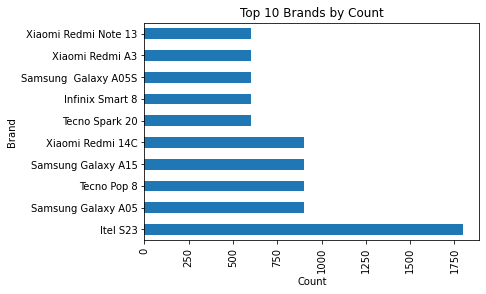

In [414]:
# Get the top 10 brands
top_brands = final_df['Brand'].value_counts().head(10)

# Plot using the horizontal bar
top_brands.plot(kind='barh')

# Add titles and labels
plt.title('Top 10 Brands by Count')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.xticks(rotation=90)  

# Show the plot
plt.show()

**Summary**: From the above top 10 brands visualization, we note that IteS23 appears to be the most listed product which could possible imply that this phone is a fast moving product due to deman among customers on the platform followed by Samsung Galaxy A05 and XIOMI Redmi 14C and Tecno POP 8 at a very close range which highlights the competitive landscape in this segment.

**Impact**: These findings could inform inventory decisions and marketing strategies to enhance visibility and sales for these trending products.

#### Top 10 Brands By Number Of Reviews

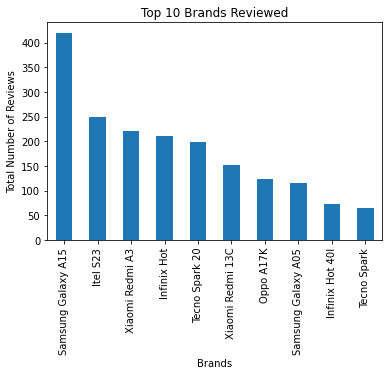

In [425]:
# Get the top 10 brands by summing the number of reviews
mostly_reviewed = final_df.groupby('Brand')['Number of Reviews'].max().nlargest(10)

# Plot using a vertical bar
mostly_reviewed.plot(kind='bar')

# Add titles and labels
plt.title('Top 10 Brands Reviewed')
plt.xlabel('Brands')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=90)  

# Show the plot
plt.show()

**Summary**: The product that received the highest numbe rof reviews is the Samsung Galaxy A15 followed by Itel S23 and Xiomi Redmi A3. 

#### Top 10 Brands By Rating

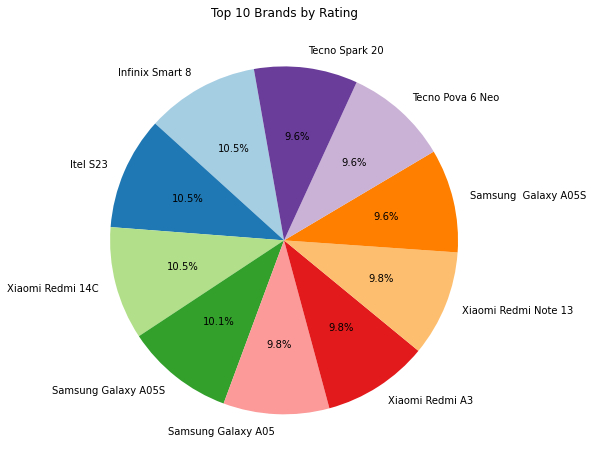

In [427]:
# Get the top 10 brands by maximum rating
top_rated = final_df.groupby('Brand')['Rating'].max().nlargest(10)

# Plot using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_rated.values, labels=top_rated.index, autopct='%1.1f%%', startangle=100, colors=plt.cm.Paired.colors)

# Add title
plt.title('Top 10 Brands by Rating')

# Show the plot
plt.show()

#### Top 10 Brands By Price

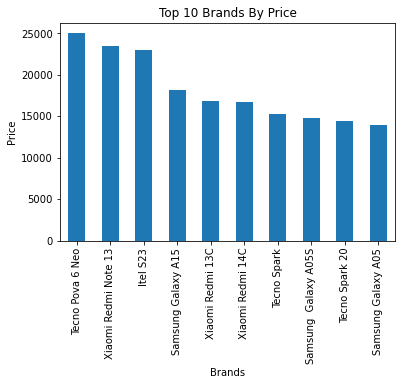

In [428]:
# Get the top 10 brands by summing the number of reviews
top_prices = final_df.groupby('Brand')['Price'].max().nlargest(10)

# Plot using a vertical bar
top_prices.plot(kind='bar')

# Add titles and labels
plt.title('Top 10 Brands By Price')
plt.xlabel('Brands')
plt.ylabel('Price')
plt.xticks(rotation=90)  

# Show the plot
plt.show()

#### 3.2 Checking for Missing Values

In [416]:
#To check for null values
null_values = final_df.isnull().sum()
null_values

Brand                   0
Screen Size           900
RAM                     0
ROM                     0
Color                2400
Warranty             9000
Price                   0
Old Price            3899
Discount             3899
Rating               1800
Number of Reviews       0
Search Ranking          0
Page                    0
Rank                    0
dtype: int64

Summary Finding:
We have null values in the columns Screen Size has 900 null values, Color has 2,400 null values, Warranty has a large number of null values (9,000), Old Price and Discount each have 3,899 null values, Rating has 1,800 null values, Number of Reviews has 300 null values.  We shall handle the missing values in the next phase which is the pre-processing using the simple imputer library ahead of the modeling step.


#### 3.3 Checking For Duplicates

In [417]:
#To check for Duplicates
final_df.duplicated().sum()

0

### 4 Data Pre-Processing
1. First we handle missing values.
2. Split the Data
3. Standardize the Data
4. Handle Categorical Data

## Modeling

## Evaluation

## Deployment

## Conclusions & Recommendations